In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
df = pd.read_csv("lung cancer.csv")
display(df)
# YES=2
# NO=1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
# Check atrributes
display(df.columns)
print(f'Number of attributes: {len(df.columns)} ')
print(f'Number of records: {len(df.index)} ')

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

Number of attributes: 16 
Number of records: 309 


In [5]:
# Allergy and Fatigue attributes are with space after, it may be confusing
df = df.rename(columns={'ALLERGY ' : 'ALLERGY', 'FATIGUE ' : 'FATIGUE'})
display(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
# Check if dataset has missing values
display(df.isnull().sum())

# Sum of total missing values
print(f'Total missing values: {df.isnull().sum().sum()}')

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Total missing values: 0


,AGE
count,309.000000
mean,62.673139
std,8.210301
min,21.000000
25%,57.000000
50%,62.000000
75%,69.000000
max,87.000000


<Axes: ylabel='Frequency'>

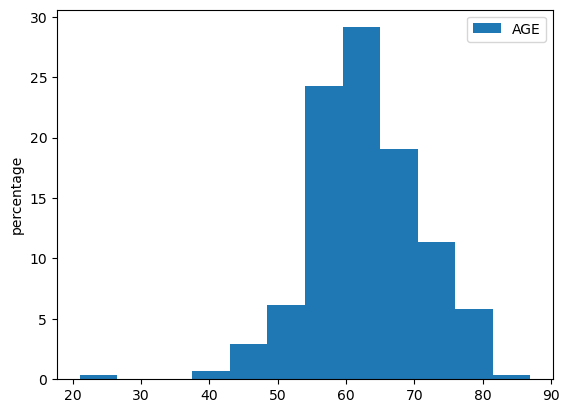

In [7]:
# Only Age is a numerical value, the rest is categorical
age_df = pd.DataFrame(df, columns=['AGE'])
display(age_df.describe())
# Histogram
display(age_df.plot(kind='hist', bins=12, weights=np.ones_like(age_df.index) / len(df.index) * 100))
plt.ylabel('percentage')
plt.show()

<Axes: ylabel='LUNG_CANCER'>

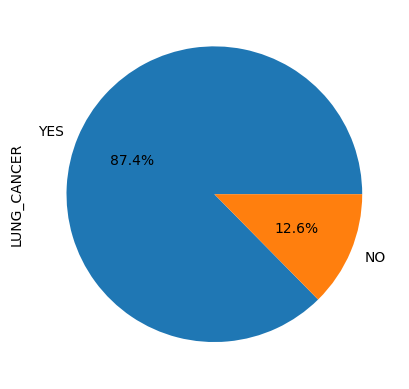

In [8]:
# Check how many people have cancer from this dataset
df['LUNG_CANCER'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='GENDER'>

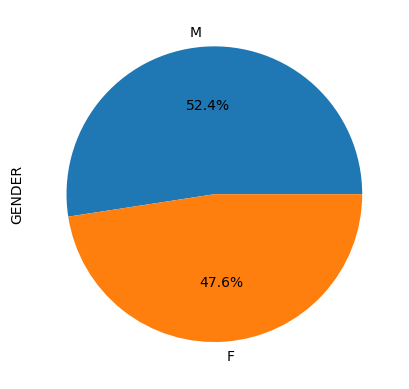

In [9]:
# Gender
df['GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%')

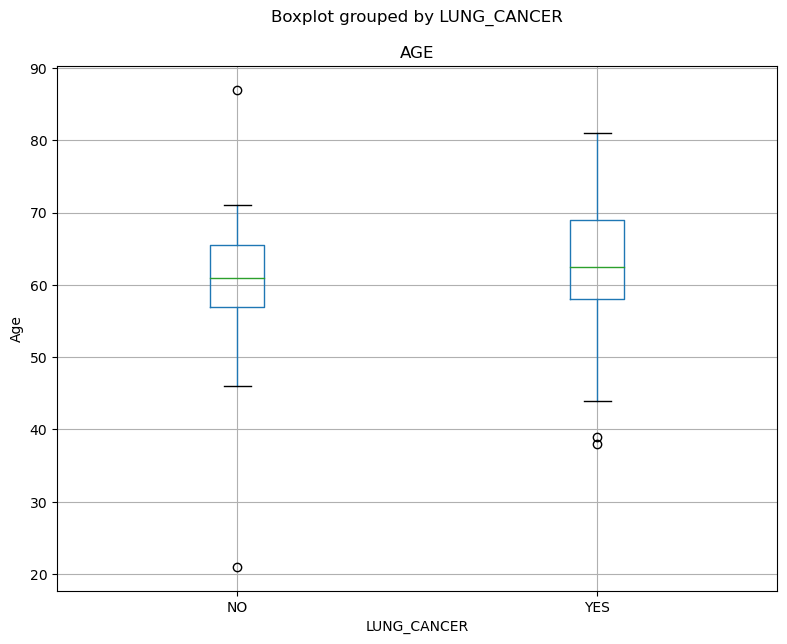

In [10]:
# Check how age is correlated with lung cancer
df.boxplot(column='AGE', by='LUNG_CANCER', figsize=(9, 7))
plt.ylabel('Age')
plt.show()

# It's pretty similar to both yes and now, but still the older you get the bigger chance of lung cancer is

In [11]:
# Replacing values of Lung cancer and gender so correlation with them may be calcualted
df_corr = df.copy()
df_corr['LUNG_CANCER'] = df['LUNG_CANCER'].replace(['YES', 'NO'], [2, 1])
df_corr['GENDER'] = df['GENDER'].replace(['M', 'F'], [2, 1])
display(df_corr)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2
305,2,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2
306,2,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2
307,2,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2


ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64

<Axes: ylabel='correlation'>

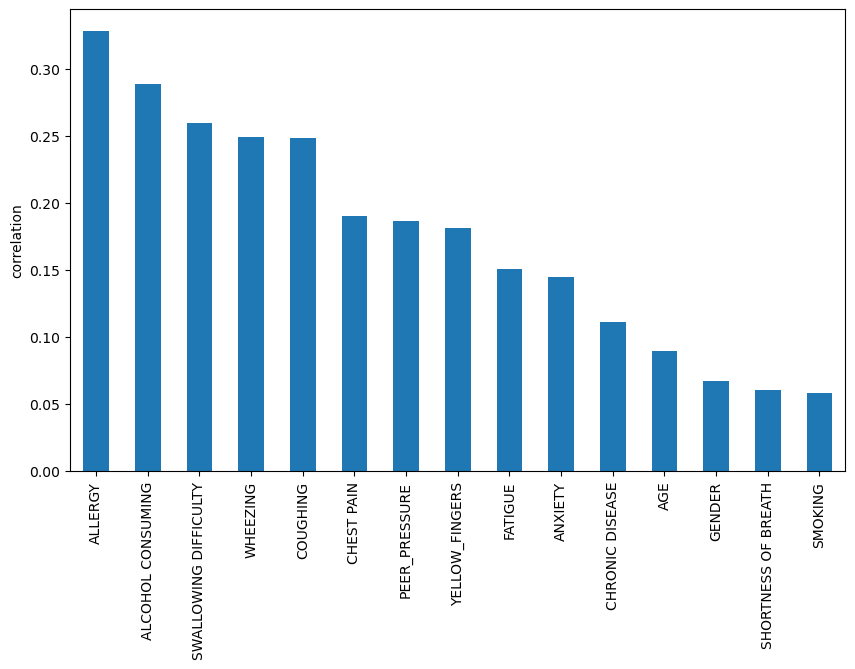

In [12]:
corr = df_corr.corr()
corr = corr.drop('LUNG_CANCER')
lung_cancer_corr = corr['LUNG_CANCER'].sort_values( ascending=False)
display(lung_cancer_corr)
lung_cancer_corr.plot(kind='bar', figsize=(10,6), ylabel='correlation')

# What's interesting is that Age and Smoking has one of the least correlation values

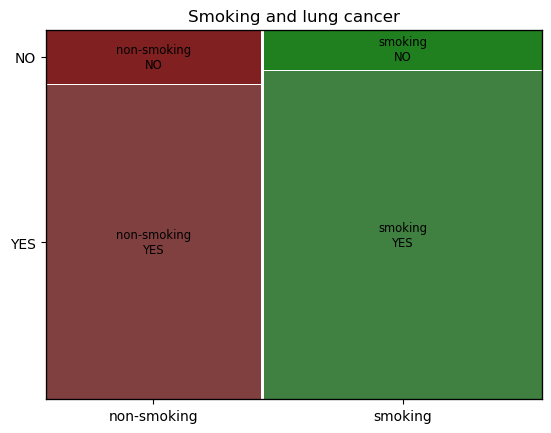

In [13]:
smoking_df = df[['SMOKING', 'LUNG_CANCER']].copy()
# changed smoking values so the plot is more readable
smoking_df['SMOKING'] = smoking_df['SMOKING'].replace([1, 2],['non-smoking' ,'smoking'])
fig = mosaic(smoking_df, index=['SMOKING','LUNG_CANCER'], title='Smoking and lung cancer')
plt.show()

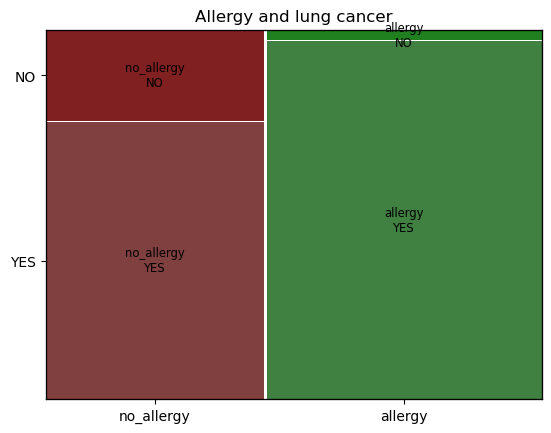

In [14]:
allergy_df = df[['ALLERGY', 'LUNG_CANCER']].copy()
allergy_df['ALLERGY'] = allergy_df['ALLERGY'].replace([1, 2],['no_allergy' ,'allergy'])
fig = mosaic(allergy_df, index=['ALLERGY','LUNG_CANCER'], title='Allergy and lung cancer')
plt.show()

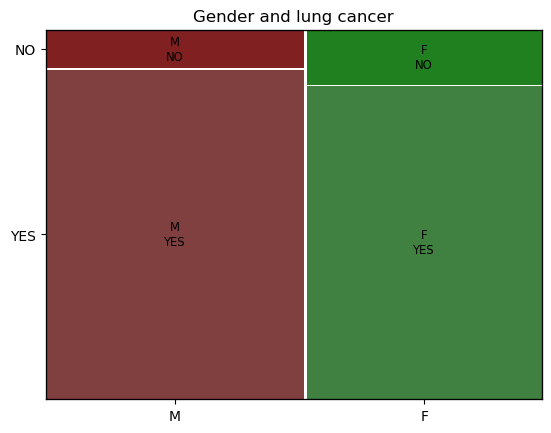

In [15]:
gender = df[['GENDER', 'LUNG_CANCER']].copy()
fig = mosaic(gender, index=['GENDER','LUNG_CANCER'], title='Gender and lung cancer')
plt.show()

In [16]:
patients = df.loc[df['COUGHING'] == 2].loc[df['ALLERGY'] == 2]
patients['LUNG_CANCER'].value_counts()


YES    112
NO       2
Name: LUNG_CANCER, dtype: int64

In [17]:
patients2 = df.loc[df['COUGHING'] == 2].loc[df['SMOKING'] == 2]
patients2['LUNG_CANCER'].value_counts()

YES    88
NO      3
Name: LUNG_CANCER, dtype: int64

<Axes: title={'center': 'People above 60 years old'}, ylabel='LUNG_CANCER'>

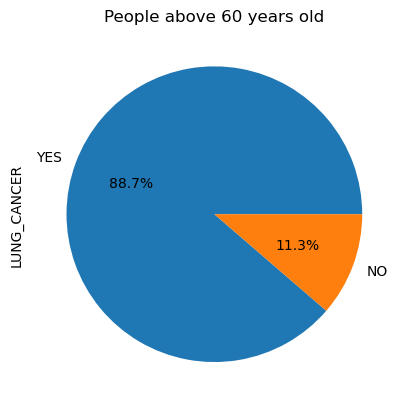

In [18]:
patients3 = df.loc[df['AGE'] >= 60]
patients3['LUNG_CANCER'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='People above 60 years old')

In [19]:
# Let's see if dataset has somebody who posses 3 of the most correlated features with lung cancer and doesn't have cancer
patients4 = df.loc[df['ALLERGY'] == 2].loc[df['ALCOHOL CONSUMING'] == 2].loc[df['SWALLOWING DIFFICULTY'] == 2].loc[df['LUNG_CANCER'] == 'NO']
display(len(patients4.index))

0

In [20]:
# In my opinion Fatigue and anxiety may be the most common features in our society, so let's check how many peoples with them have cancer\
patients5 = df.loc[df['ANXIETY'] == 2].loc[df['FATIGUE'] == 2]
patients5['LUNG_CANCER'].value_counts()

YES    87
NO      3
Name: LUNG_CANCER, dtype: int64

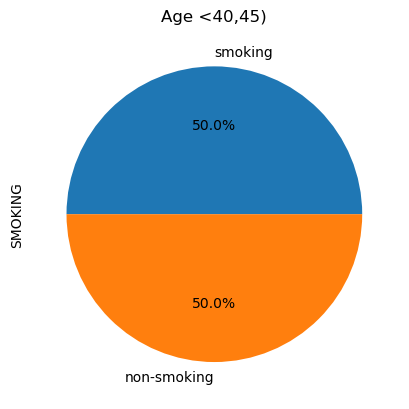

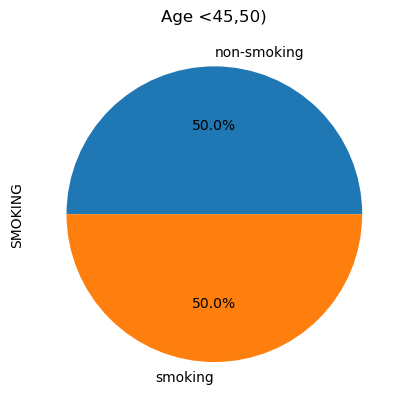

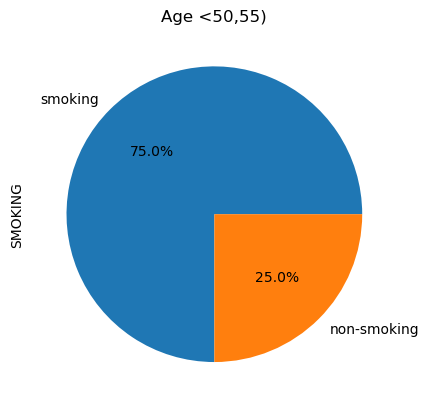

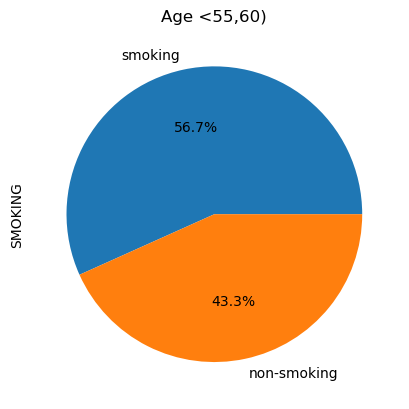

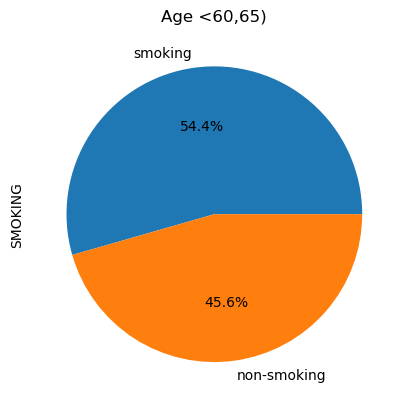

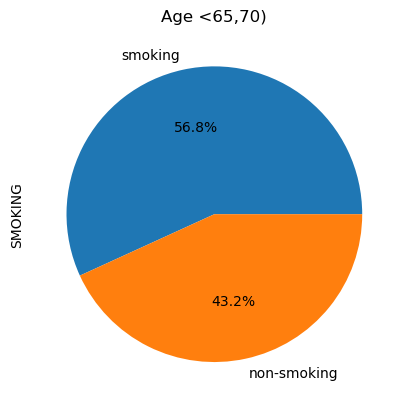

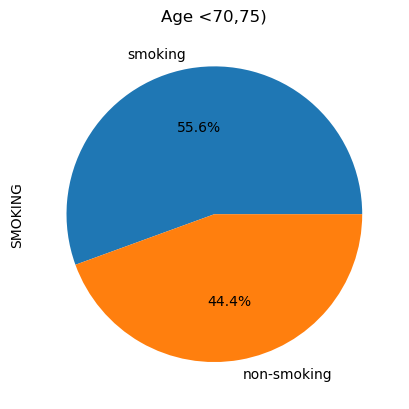

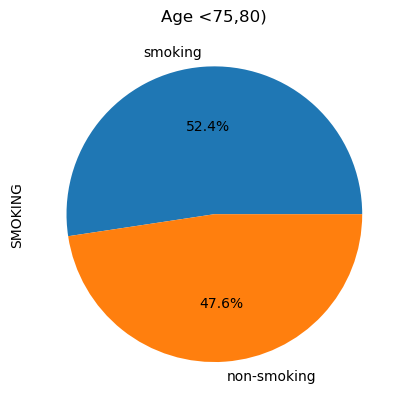

In [60]:
for i in [40,45,50,55,60,65,70,75]:
    temp_patients = df.loc[df['AGE'] >= i].loc[df['AGE'] < i+5]
    temp_patients['SMOKING'].replace([1, 2],['non-smoking' ,'smoking']).value_counts().plot(kind='pie', autopct='%1.1f%%', title=f'Age <{i},{i+5})')
    plt.show()
    
# Interesting smoking ratio is similar in every age group expect 50-55

#### After exploring this dataset I realized it's imbalanced and probably not useful 